# Social Indicators Prediction

In [1]:
import pandas as pd

data = pd.read_pickle('./../data/social_regression_data.pickle')
data.head()

,population,site_area,is_living,footprint_area,build_floor_area,living_area,non_living_area,buildings_count,agriculture,industrial,...,guest_house_count,school_count,pitch_count,hospital_count,polyclinic_count,emergency_medical_service_stations_count,restaurant_count,pharmacy_count,longitude,latitude
3,2154,958000.0,107.0,134350.198599,1.486228e+05,18790.798548,129551.116050,973,9.895049e+06,4.271492e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-771885.613281,6.809647e+06
4,1698,732000.0,15.0,167346.131884,1.839993e+05,19628.059600,164371.238284,1016,3.137606e+06,2.275153e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-780323.931010,6.841250e+06
5,20169,45000.0,1484.0,897718.375067,1.446731e+06,530190.233798,899757.274216,3448,6.347738e+04,1.899003e+06,...,0.0,4.0,9.0,1.0,1.0,0.0,5.0,7.0,-775855.937394,6.821746e+06
6,3393,699000.0,70.0,207072.938797,2.546795e+05,56015.386519,195416.138670,502,1.859899e+06,1.173573e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-798102.040434,6.809219e+06
7,15960,261000.0,225.0,479686.323942,8.471635e+05,353020.537179,484596.269902,2155,1.301242e+06,2.936352e+05,...,0.0,3.0,5.0,1.0,1.0,0.0,1.0,3.0,-787756.552231,6.821318e+06


## Predicting using quantile regression

In [3]:
from blocksnet.machine_learning.regression import SocialRegressor

# sr = SocialRegressor()

# if you want to train one yourself
sr = SocialRegressor(n_estimators=100, max_depth=4, min_samples_split=5)

2025-05-27 16:04:58.876 | WARNING  | blocksnet.machine_learning.regression.social.common.model_wrapper:__init__:32 - Keyword arguments provided. The model_path is ignored


Getting data divided into a training and a test sample

In [4]:
x_train, x_test, y_train, y_test = sr.get_train_data(data)

Train model

In [5]:
sr.train(x_train, y_train, confidence_level=95.0)

2025-05-27 16:05:16.289 | INFO     | blocksnet.machine_learning.regression.social.common.model_wrapper:_train_model:80 - Fitting median model
2025-05-27 16:05:47.337 | INFO     | blocksnet.machine_learning.regression.social.common.model_wrapper:_train_model:89 - Fitting lower model
2025-05-27 16:05:49.852 | INFO     | blocksnet.machine_learning.regression.social.common.model_wrapper:_train_model:100 - Fitting upper model


Save fitted model

In [6]:
sr.save_model('./model.pickle')

## Model Validation

In [7]:
y_pred, pi_lower, pi_upper = sr.evaluate(x_test)

Showing predictions

In [8]:
y_pred.head()

,nursing_home_count,hotel_count,theatre_count,cinema_count,secondary_vocational_education_institutions_count,university_count,stadium_count,emergency_medical_service_stations_count,kindergarten_count,hostel_count,...,post_count,swimming_pool_count,library_count,guest_house_count,fire_safety_facilities_count,restaurant_count,police_count,museum_count,bank_count,pitch_count
14296,0.014379,-0.000832,0.001763,0.016099,0.039391,0.479495,0.105324,0.005666,0.296905,0.010605,...,0.072575,0.020337,0.040035,0.033931,0.033148,0.092938,0.037970,0.028900,0.064677,0.987647
3310,0.012930,0.803748,0.081753,0.202503,1.084357,0.137536,1.110656,0.230271,5.922528,0.070684,...,0.302535,0.109361,0.363499,0.212221,0.722693,1.204709,0.836241,0.587259,0.489967,17.555252
16148,0.249490,13.239592,0.481125,1.550649,3.687493,1.599196,2.781085,0.267505,23.173780,0.916293,...,1.557643,13.684464,1.686338,0.224791,1.782080,15.103293,2.445613,1.884544,1.571543,84.765625
17455,-0.003019,0.009737,-0.004039,0.006393,0.019949,0.001556,0.085916,-0.000057,0.383974,-0.001581,...,0.144662,0.030829,0.018814,0.171654,0.001377,0.121550,0.095347,0.025819,0.004237,0.626067
16291,0.013056,0.088273,0.002856,0.019799,0.034916,0.024223,0.249959,0.007760,0.771067,0.012497,...,0.444398,0.005997,0.135191,0.156082,0.167819,0.178831,0.075085,0.083318,0.011640,1.925919


Calculating statistics

In [9]:
stats_df = sr.calculate_interval_stats(y_pred, pi_lower, pi_upper, y_test)

Showing prediction intervals

In [10]:
pi_lower.head()

,nursing_home_count,hotel_count,theatre_count,cinema_count,secondary_vocational_education_institutions_count,university_count,stadium_count,emergency_medical_service_stations_count,kindergarten_count,hostel_count,...,post_count,swimming_pool_count,library_count,guest_house_count,fire_safety_facilities_count,restaurant_count,police_count,museum_count,bank_count,pitch_count
14296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
pi_upper.head()

,nursing_home_count,hotel_count,theatre_count,cinema_count,secondary_vocational_education_institutions_count,university_count,stadium_count,emergency_medical_service_stations_count,kindergarten_count,hostel_count,...,post_count,swimming_pool_count,library_count,guest_house_count,fire_safety_facilities_count,restaurant_count,police_count,museum_count,bank_count,pitch_count
14296,0.800304,1.000252,0.000069,0.000049,0.158654,0.000215,1.000184,0.000031,1.995936,0.000027,...,1.833845,0.000129,0.949811,0.106655,1.000122,1.000830,0.134224,0.355738,1.000056,2.654914
3310,0.800304,6.321808,0.934067,1.099999,3.683720,2.214749,4.400317,1.064502,14.263688,1.000000,...,1.839819,0.999986,1.761400,1.722426,2.808025,8.334574,3.968300,4.091033,2.599319,38.652114
16148,1.200304,49.796808,2.152624,2.460287,6.560348,4.628682,6.023683,1.729038,36.571412,2.704440,...,2.497692,81.805113,3.051844,11.955599,4.280855,22.667316,5.653427,4.226640,2.697712,103.612669
17455,0.000027,1.000252,0.000069,0.000049,0.000340,0.000215,1.821733,0.000031,1.011686,0.000027,...,1.523892,0.000129,0.877675,1.335098,1.000122,1.000830,0.436661,0.297617,1.000056,2.118286
16291,0.800304,1.669386,0.459638,0.000049,1.100385,0.000215,1.902446,0.000031,3.415354,0.000027,...,1.780039,0.999986,1.114143,2.099003,1.669316,1.999971,1.647817,1.395385,1.000056,6.649416


Showing validation statistics

In [12]:
stats_df

y,coverage_percentage,mean_interval_width,mse,rmse,mae,r2
nursing_home_count,99.473684,0.421085,0.024088,0.155203,0.046052,-0.272759
hotel_count,97.368421,3.772173,26.111585,5.109950,1.009036,0.276750
theatre_count,96.842105,0.547877,0.358543,0.598784,0.169514,0.364897
cinema_count,97.192982,0.437983,0.102323,0.319880,0.108495,0.146454
secondary_vocational_education_institutions_count,96.491228,1.577391,1.027018,1.013419,0.379245,0.678409
university_count,96.491228,1.205866,4.898239,2.213197,0.493575,0.370108
stadium_count,97.192982,2.360784,1.096632,1.047202,0.503562,0.576055
emergency_medical_service_stations_count,97.894737,0.231561,0.102410,0.320016,0.096631,0.361666
kindergarten_count,96.315789,8.174934,26.301057,5.128456,1.679345,0.827755
hostel_count,97.192982,0.457503,2.267950,1.505971,0.253160,-1.489247


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_prediction(target_name : str, y_pred, pi_lower, pi_upper, y_test):

  # Filter data where y_test values are positive
  mask = y_test[target_name].values > 0
  filtered_pred_df = y_pred[mask]
  filtered_pi_lower = pi_lower[mask]
  filtered_pi_upper = pi_upper[mask]
  filtered_y_test = y_test[mask]

  # Parameters for slicing (default is full filtered range)
  start_idx = 0  # Starting index (can be changed)
  end_idx = 50   # Ending index (can be changed)

  # Extract data from filtered DataFrames with slicing
  x = np.linspace(0, len(filtered_pred_df) - 1, len(filtered_pred_df))[start_idx:end_idx + 1]
  y_pred = filtered_pred_df[target_name].values[start_idx:end_idx + 1]
  y_test = filtered_y_test[target_name].values[start_idx:end_idx + 1]

  # Extract intervals from pi_df (now stored as tuples)
  lower_bound = filtered_pi_lower[target_name].values[start_idx:end_idx + 1] 
  upper_bound = filtered_pi_upper[target_name].values[start_idx:end_idx + 1] 

  # Create the plot
  plt.figure(figsize=(10, 6))
  plt.plot(x, y_pred, label='Predictions', marker='o')
  plt.plot(x, y_test, label='True Values', marker='s')
  plt.fill_between(x, lower_bound, upper_bound, alpha=0.2, label='Prediction Intervals')

  # Configure the plot
  plt.xlabel('Indices')
  plt.ylabel('Value')
  plt.title('Comparison of Predictions and True Values with Intervals')
  plt.legend()
  plt.grid(True)
  plt.xticks(x)
  plt.tight_layout()

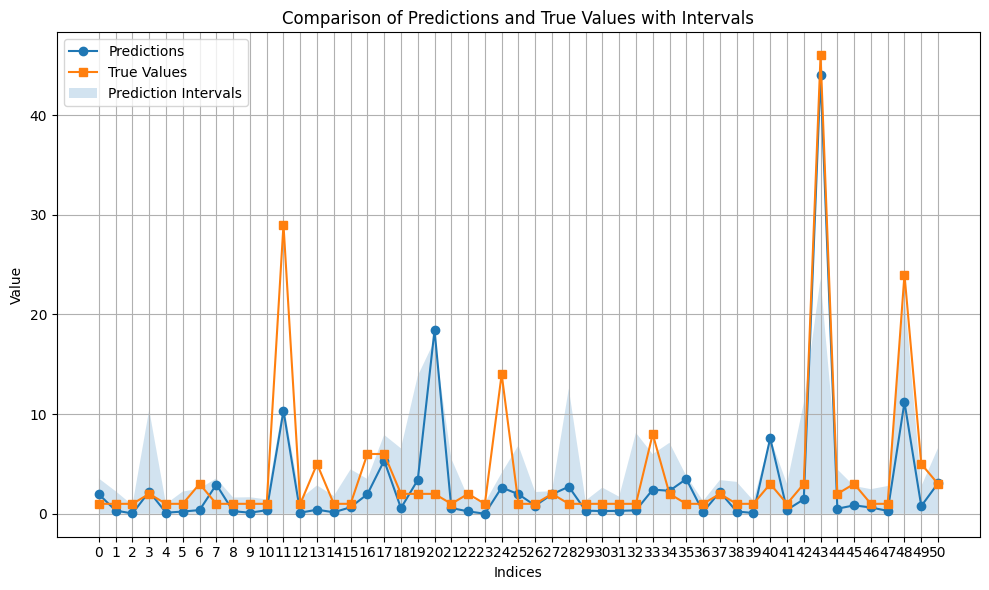

In [23]:
target_name = 'pharmacy_count'

visualize_prediction(target_name, y_pred, pi_lower, pi_upper, y_test)

## Error for different targets

[]

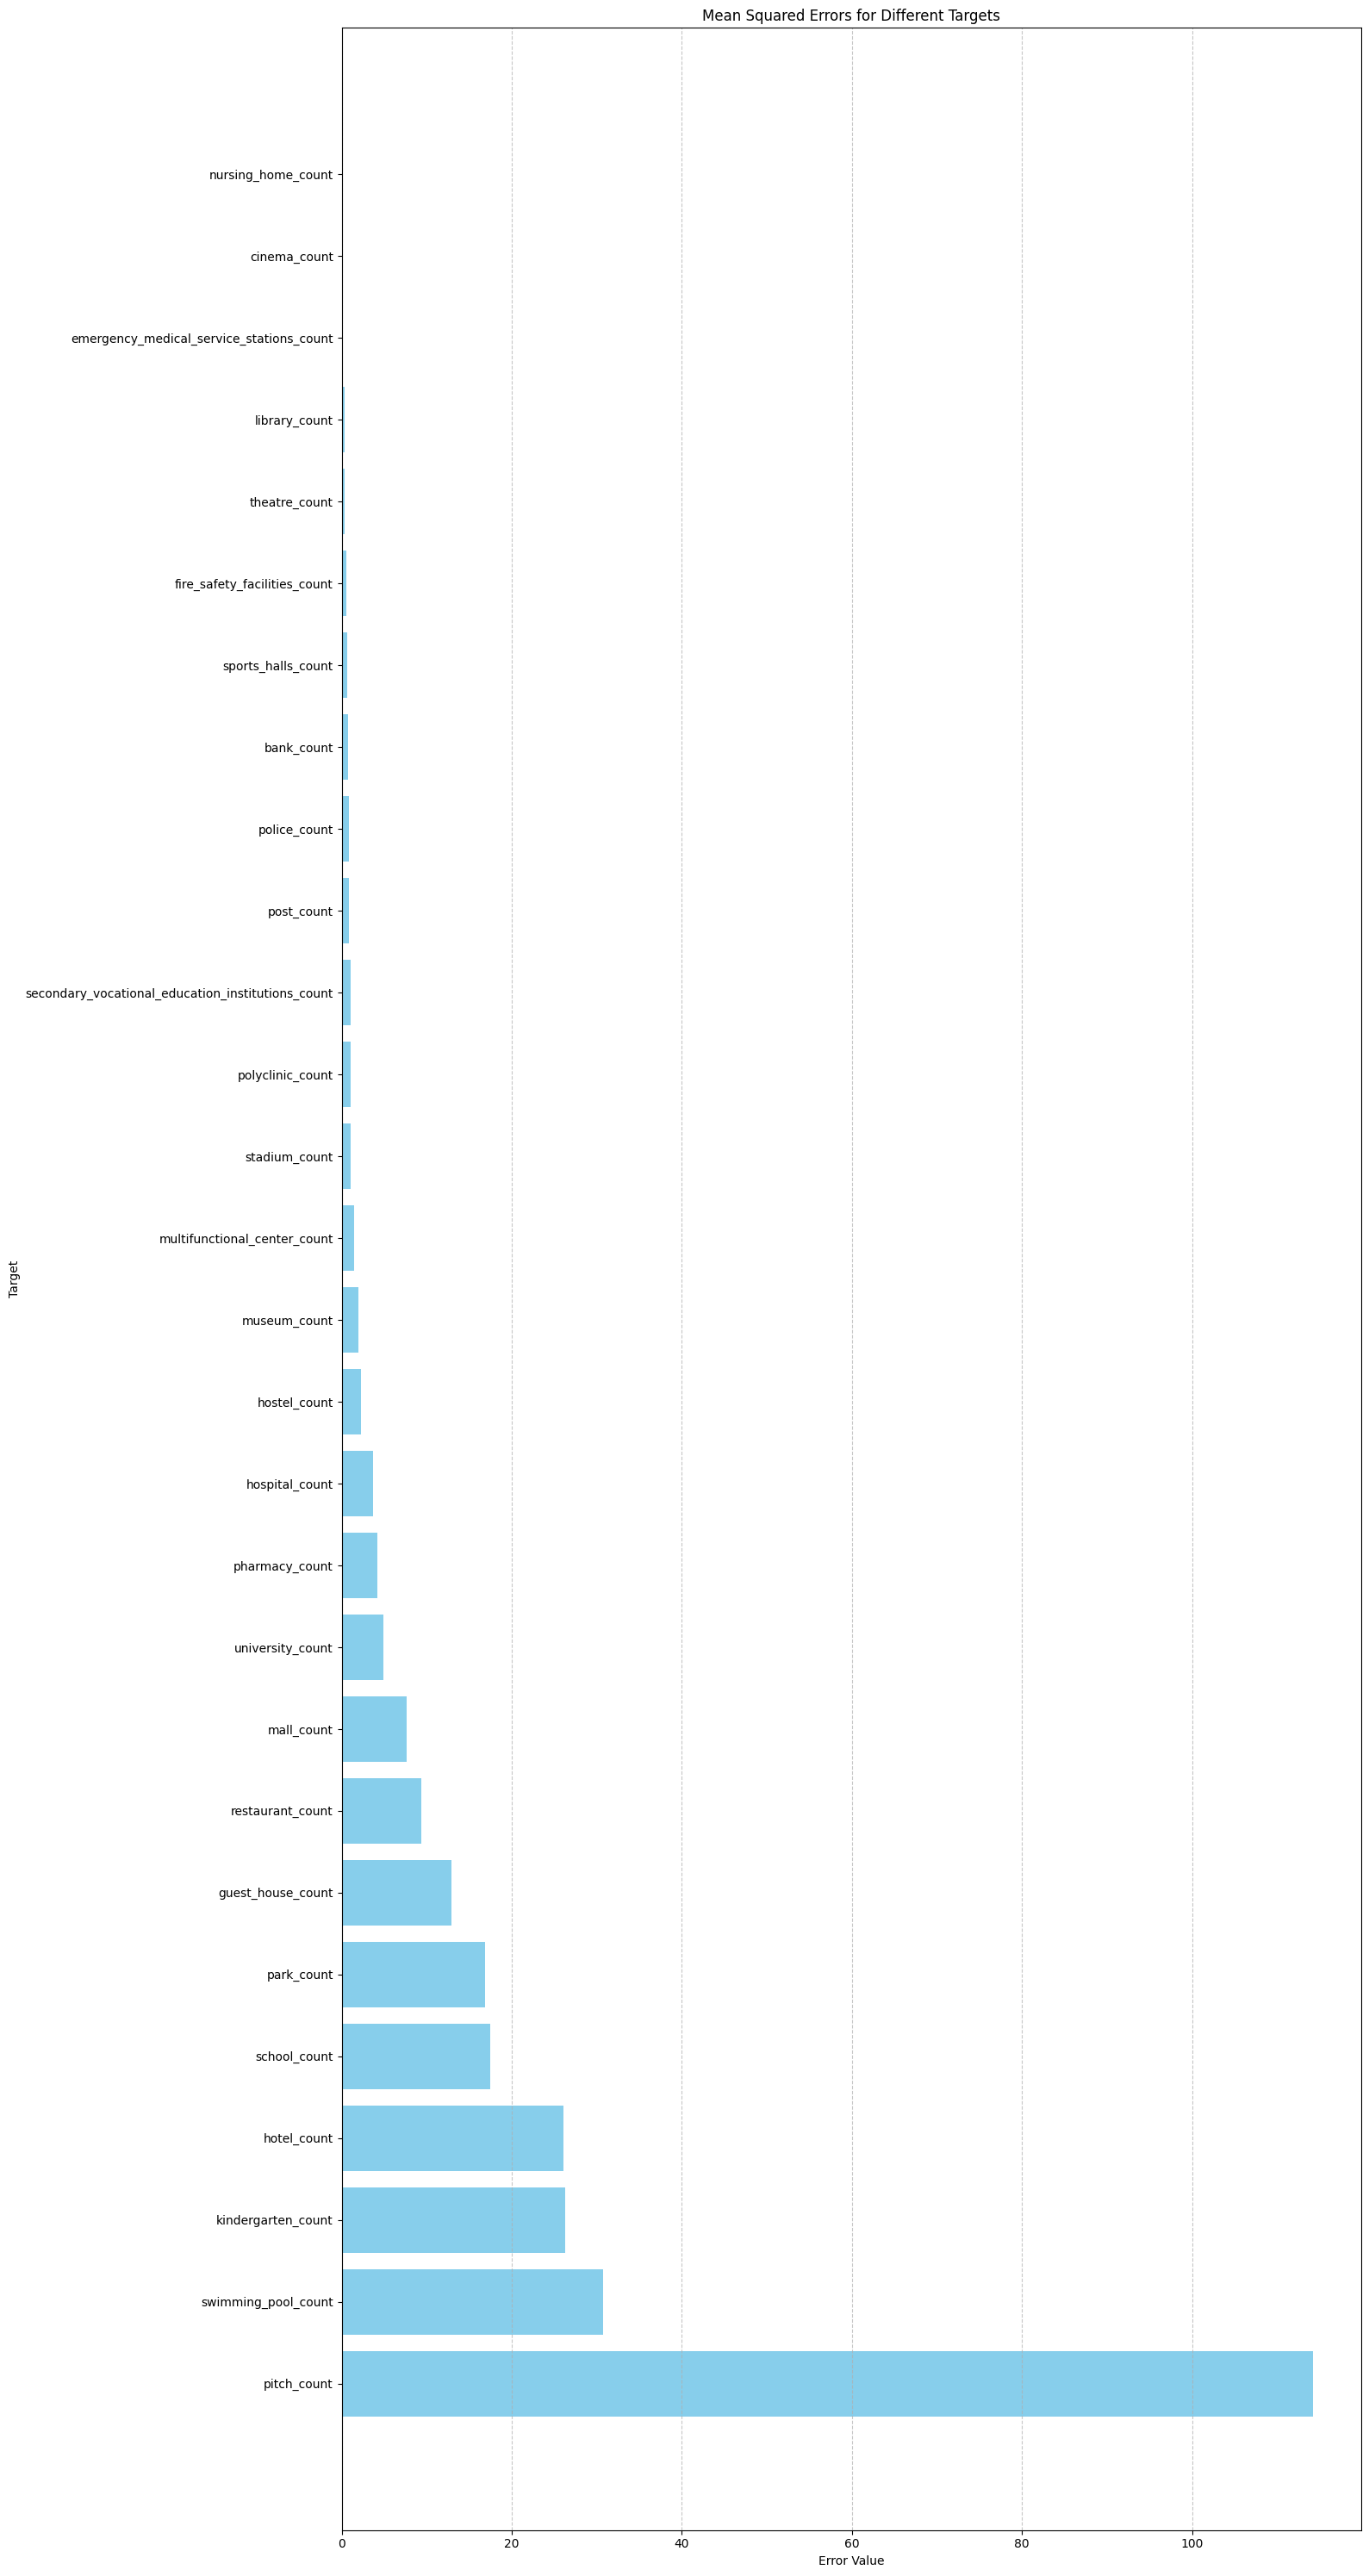

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming stats_df is obtained from calculate_interval_stats and has been transposed
# Example: pred_df, pi_df = ir.predict_with_intervals(X_test, inverse_transform=False)
# stats_df = ir.calculate_interval_stats(pred_df, pi_df, y_test).T

# Extract MSE values and target names from transposed stats_df
mse = stats_df['mse'].values
target_names = stats_df.index

# Sort by descending MSE
sorted_indices = np.argsort(mse)[::-1]
sorted_mse = mse[sorted_indices]
sorted_targets = target_names[sorted_indices]

# Create horizontal bar plot
plt.figure(figsize=(16, 30))
plt.barh(sorted_targets, sorted_mse, color='skyblue')

# Add labels and title
plt.ylabel('Target')
plt.xlabel('Error Value')
plt.title('Mean Squared Errors for Different Targets')

# Add grid and save plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.plot()

## LIME Prediction

Mean Squared Error: 4.898
Predicted value: 0.479
Real value: 0.0
Explanation:
[('business > 15183.04', 2.9534802613554785), ('population <= 1136.00', -0.5860909439229887), ('transport <= 0.00', 0.3809469174382578), ('74914.77 < industrial <= 528208.61', -0.2871944980298722), ('buildings_count <= 4.00', -0.23936306374227934), ('area <= 63000.00', -0.1874804409055796), ('34922.80 < special <= 156359.65', -0.1421858470028649), ('footprint_area <= 0.00', -0.12259403792263908), ('longitude <= -883053.12', 0.12092895926078623), ('444312.69 < recreation <= 4056059.51', 0.10099483719723343)]


[]

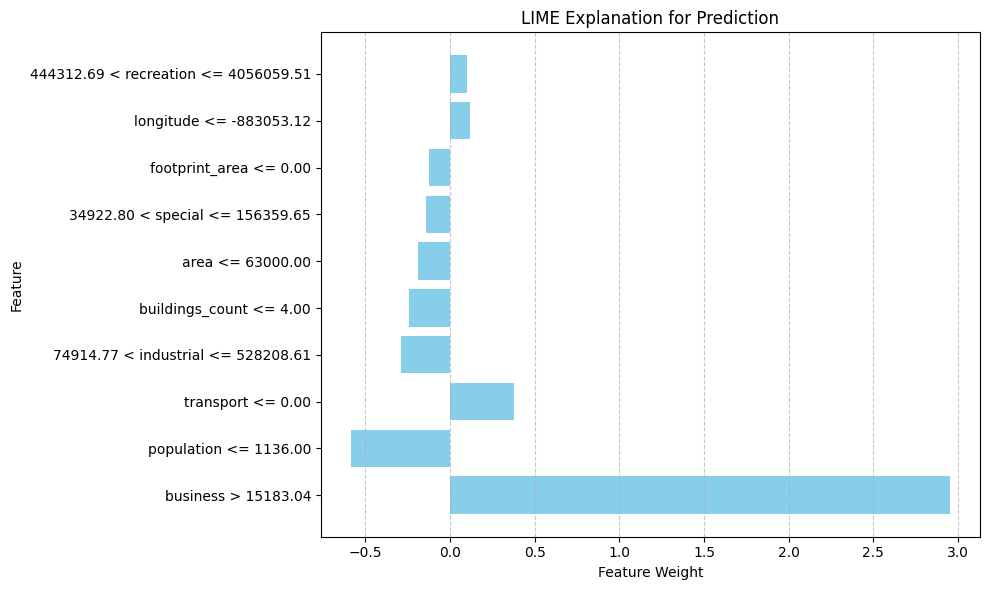

In [ ]:
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Target column
column = 'university_count'

# Fill missing values in y_train
y_train = y_train.fillna(0)

# Use ir model for predictions
pred_df, pi_df = sr.evaluate_with_intervals(X_test, inverse_transform=False)

# Get MSE from stats_df (assuming stats_df is transposed)
stats_df = sr.calculate_interval_stats(pred_df, pi_df, y_test)
mse = stats_df.loc[column, 'mse']

# Print MSE
print(f'Mean Squared Error: {mse:.3f}')

# Helper function for LIME to predict with ir model for the specific column
def predict_fn(X):
    # Convert input to DataFrame with correct column names
    X_df = pd.DataFrame(X, columns=X_train.columns)
    # Get predictions from ir model
    pred_df, _ = sr.evaluate_with_intervals(X_df, inverse_transform=False)
    # Return predictions for the specific column
    return pred_df[column].values

# Create LIME explainer for tabular data
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Convert DataFrame to numpy array
    feature_names=X_train.columns,  # Feature names
    class_names=[column],  # Target name for regression
    mode='regression',  # Task type: regression
    random_state=42
)

# Select one instance for interpretation (e.g., first from test set)
i = 0
instance = X_test.iloc[i].values.reshape(1, -1)

# Get explanation for the selected instance
explanation = explainer.explain_instance(instance[0], predict_fn)

# Print prediction and real value
print("Predicted value:", pred_df[column].iloc[i])
print("Real value:", y_test[column].iloc[i])
print("Explanation:")
print(explanation.as_list())

# Get explanation as a list
explanation_list = explanation.as_list()

# Split explanation into features and weights
features, weights = zip(*explanation_list)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, weights, color='skyblue')

# Add labels and title
plt.xlabel("Feature Weight")
plt.ylabel("Feature")
plt.title("LIME Explanation for Prediction")

# Add grid and save plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.plot()